<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/main/List1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [385]:
# # install
!pip install flake8
!pip install pycodestyle pycodestyle_magic


# # load
%load_ext pycodestyle_magic

%pycodestyle_on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [386]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#Zadanie 1

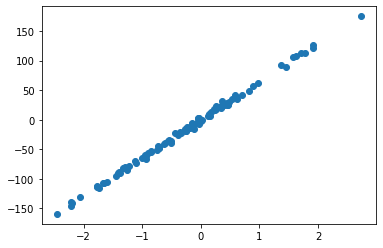

In [387]:
# Data without modification
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=3)

plt.scatter(x_data, y_data)
plt.show()

In [388]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f'x_train shape {x_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')
# TODO: Add cross validation for another linear models

x_train shape (75, 1)
x_test shape (25, 1)
y_train shape (75, 1)
y_test shape (25, 1)


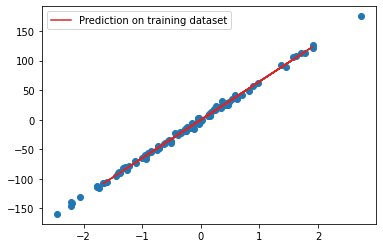

MSE on train dataset: 3.0862774096226286
MSE on test dataset: 2.658917590431427
Diffrence: 0.4273598191912016


In [389]:
linreg = LinearRegression().fit(x_train,
                                y_train)

y_test_predict = linreg.predict(x_test)
y_train_predict = linreg.predict(x_train).reshape(-1, 1)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")
plt.legend()
plt.show()

# test_mse = mean_squared_error(y_test_predict, x_test, squared=False)
# train_mse = mean_squared_error(y_train_predict, x_train, squared=False)

test_mse = mean_squared_error(y_test, y_test_predict, squared=False)
train_mse = mean_squared_error(y_train, y_train_predict, squared=False)

print(f'MSE on train dataset: {train_mse}')
print(f'MSE on test dataset: {test_mse}')
print(f'Diffrence: {abs(train_mse - test_mse)}')

# Zadanie 2

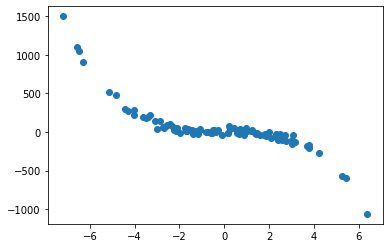

In [390]:
def make_polynomial_regression(n_samples=100.0, noise=0.1,
                               degree=2, x_axis_span=2.5):
    X = x_axis_span*np.random.randn(n_samples, 1)
    y = 4 + 2*X + (-4)*X**degree + noise*np.random.randn(n_samples, 1)
    return X, y, degree


n = 100
noise = 30
x_data, y_data, degree = make_polynomial_regression(n, noise, 3)

plt.scatter(x_data, y_data)
plt.show()

In [391]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

for one_set in (x_train, x_test, y_train, y_test):
    print(one_set.shape)

(75, 1)
(25, 1)
(75, 1)
(25, 1)


In [392]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_data_poly = poly_features.fit_transform(x_data)

reg = LinearRegression()
reg.fit(x_data_poly, y_data)

# TODO: split datasets on train and test

LinearRegression()

In [393]:
x_vals = np.linspace(np.min(x_data), np.max(x_data), n).reshape(-1, 1)
x_vals_poly = poly_features.transform(x_vals)

y_vals = reg.predict(x_vals_poly)

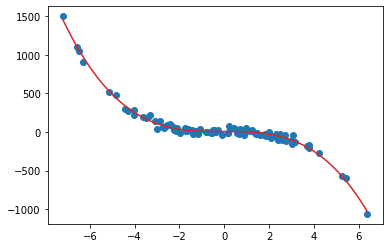

In [394]:
plt.scatter(x_data, y_data)
plt.plot(x_vals, y_vals, color="tab:red")

plt.show()

# Zadanie 3

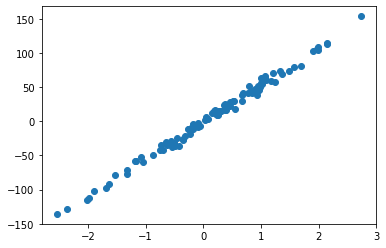

In [395]:
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=5)

plt.scatter(x_data, y_data)
plt.show()

In [396]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f'x_train shape {x_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

x_train shape (75, 1)
x_test shape (25, 1)
y_train shape (75, 1)
y_test shape (25, 1)


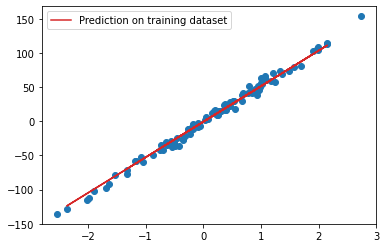

MSE on train dataset: 5.280520188153514
MSE on test dataset: 5.200177747996138
Diffrence: 0.08034244015737624


In [397]:
ridge_reg = Ridge(alpha=3.0).fit(x_train, y_train)

y_test_predict = ridge_reg.predict(x_test)
y_train_predict = ridge_reg.predict(x_train)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")

plt.legend()
plt.show()

# test_mse = mean_squared_error(y_test_predict, x_test, squared=False)
# train_mse = mean_squared_error(y_train_predict, x_train, squared=False)
test_mse = mean_squared_error(y_test, y_test_predict, squared=False)
train_mse = mean_squared_error(y_train, y_train_predict, squared=False)

print(f'MSE on train dataset: {train_mse}')
print(f'MSE on test dataset: {test_mse}')
print(f'Diffrence: {abs(train_mse - test_mse)}')

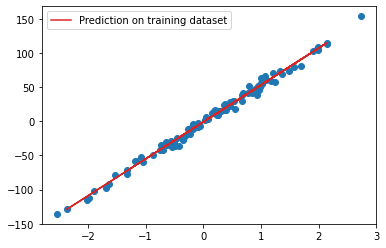

MSE on train dataset: 4.8732114742507955
MSE on test dataset: 4.687011774156991
Diffrence: 0.1861997000938045


In [398]:
lin_reg = LinearRegression().fit(x_train, y_train)

y_test_predict = lin_reg.predict(x_test)
y_train_predict = lin_reg.predict(x_train)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")

plt.legend()
plt.show()

# test_mse = mean_squared_error(y_test_predict, x_test)
# train_mse = mean_squared_error(y_train_predict, x_train)

test_mse = mean_squared_error(y_test, y_test_predict, squared=False)
train_mse = mean_squared_error(y_train, y_train_predict, squared=False)

print(f'MSE on train dataset: {train_mse}')
print(f'MSE on test dataset: {test_mse}')
print(f'Diffrence: {abs(train_mse - test_mse)}')